# Домашнее задание 1

Это домашнее задание по материалам первой и второй недели семестра (1-2 лекции и семинары). Дедлайн по отправке - 23:59 24 сентября.

- Домашнее задание выполняется в этом же Jupyter Notebook'e.

- Файл необходимо переименовать: __Номер группы_Фамилия_Имя__ (без пробелов в начале и конце). Пример: __Б05-100_Иванов_Иван__.

- ДЗ нужно отправлять на __OptimizationHomework@yandex.ru__. Тема письма: __МФТИ_номер задания__ (без пробелов в начале и конце). Для данного ДЗ тема письма: __МФТИ_1__.

- Решение каждой задачи/пункта задачи поместите после условия.

- Не забывайте добавлять необходимые пояснения и комментарии.

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокоментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте).

- При полном запуске решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок.

- Максимальный балл за задание 100.

Желаем успехов!

**СУММА БАЛЛОВ:** **44 из 100 баллов**

### Часть 1. Дихотомия и Золотое сечение

__Определение__ Одномерная функция $f: [a,b] \to \mathbb{R}$ называется унимодальной на отрезке $[a,b]$, если существует $c^* \in [a,b]$ такое, что

1) для любых $a \leq x < y \leq c^*$ имеем $f(x) > f(y)$,

2) для любых $c^* \leq x < y \leq b$ имеем $f(x) < f(y)$.

В этом задании будем минимизировать такого рода функции.

__Задача 1. (всего 15 баллов)__ Рассмотрим метод дихотомии:

```python
def binpoisk(f, a, b, eps):
    c = (a + b) / 2
    while (b - a) > eps:
        d = (a + c) / 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
    return c
```

__а). (4 балла)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции.

Докажем корректность:
1. Изначально знаем, что у функции один локальный экстремум на отрезке $[a, b]$.
2. Пока отрезок меньше заданной длины $\varepsilon$, будем находить его середину $c$ и исследовать его половины до нахождения точки в $\varepsilon$-окрестности локального экстремума.
3. Рассмотрим середину $d$ первой половины отрезка: если значение функции в точке  $d$ меньше значения функции в точке $c$, то в силу унимодальности функции экстремум находится между этими двумя точками. Тогда необходимо исследовать только выбранную половину отрезка, поэтому правой границей вместо $b$ считаем $c$ и возвращаемся к шагу 2.
4. Если же условие из предыдущего шага не выполнено, то рассмотрим уже середину $e$ второй половины изначального отрезка: если значение функции в точке  $с$ меньше значения функции в точке $e$, то из невыполнения условия пункта 3 и унимодальности функции экстремум следует искать на отрезке $[d, e]$ и вернутьтся для него к шагу 2.
5. Если же ни на одном из предыдущих шагов не было найдено отрезка содержащего локальный экстремум, то в силу унимодальности функции он будет гарантированно соержаться на отрезке $[c, b]$ - будем иссдледовать егот начиная с пункта 2.


Таким образом, на каждом шаге нашей функции будет выбираться отрезок, на котором следует искать локальный экстремум (функция унимодальна, значит такой отрезок будет лишь один) и это будет выполняться до момента, пока локальный экстремум не будет обнаружен с заданной точностью $\varepsilon$.  

Сходимость же алгоритма следует из того, что каждый раз длина отрезка, на котором проводится поиск и гарантированно сожержится экстремум уменьшается в два раза, поэтому для любого заданного $\varepsilon > 0$ через определенное кодичество шагов найдется отрезок, содержащий локальный экстремум.

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** нет конкретной оценки для сходимости **3 из 4 баллов**

__б). (6 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Т.е. необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

Сначала получим верхнюю оценку на итерационную сложность:  
За каждую итерацию мы сокращаем длину отрезка на котором следует проводить поиск ровно в 2 раза. Тогда необходимо, чтобы после выполнения последней итерации алгоритма длина исследуемого отрезка не превосходила заданного $\varepsilon$. То есть, если было выполнено $k$ итераций, то должно быть выполнено условие $\frac{b - a}{2^k} \leq \varepsilon$. Из этого можно получить следующую оценку: $$k \geq \log_{2}\frac{b - a}{\varepsilon}.$$ Но исходя из логики самого алгоритма и из того факта, что $k$ целое можно получить следующую оценку: $$k \leq \lfloor \log_{2}\frac{b - a}{\varepsilon} \rfloor + 1.$$  
  
Теперь оценим оракульную сложность:  
Понятно, что за каждую итерацию мы можем обращаться к оракулу максимум 4 раза. Тогда, выяснив итерационную сложность, получим верхнюю оценку на оракульную сложность: $$o \leq 4 \cdot (\lfloor \log_{2}\frac{b - a}{\varepsilon} \rfloor + 1).$$

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **6 из 6 баллов**

__в). (2 балла)__ Придумайте свою унимодальную функцию (постарайтесь придумать не самый тривиальный пример, если совсем не получается обратите внимание на функцию $f(x) = \sin x \cdot e^x$ и модернизируйте ее). Покажите, что она является унимодальной на каком то отрезке. Где у нее находится $c^*$?

Рассмотрим функцию $$f(x) = e^\frac{x}{10} \cdot (sin(\frac{x}{10}) - 1) .$$  
Ее производная равна $\frac{1}{10} \cdot e^\frac{x}{10} \cdot (sin(\frac{x}{10}) + cos(\frac{x}{10}) - 1)$, она равна нулю в таких точках $x$, что $sin(\frac{x}{10}) + cos(\frac{x}{10}) - 1 = 0 .$
Это выражение можно преобразовать в следующий вид: $$cos(\frac{x}{10} - \frac{\pi}{4}) = \frac{\sqrt{2}}{2} .$$  
Тогда получим, что производная равна нулю в точках $x = 20\pi n$ и $x = 5\pi + 20\pi n$, где $n$ принадлежит множеству целых чисел.  
Рассмотрим отрезок $[-40, 15]$. На нем имеется только одна точка экстремума: $x = 0$, то есть функция является унимодальной на этом отрезке и ее $c^* = 0$.

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **2 из 2 баллов**

__г). (3 балла)__ Реализуйте и запустите для этой функции метод дихотомии. Постройте 2 графика сходимости:

1) по оси абцисс - число итераций, по оси ординат - $|c_{out} - c^*|$,

2) по оси абцисс - число оракульных вызовов $f$, по оси ординат - $|c_{out} - c^*|$.

Нанесите на оба графика теоретическую оценку из пункта а). Сделайте вывод.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет две линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
def f(x):
    return math.exp(x/10) * (math.sin(x/10) - 1)

In [ ]:
def dichotomy(f, a, b, eps, points, iterations_count_list, oracle_call_count_list):
    iterations_count = 0
    oracle_call_count = 0
    c = (a + b) / 2
    while (b - a) > eps:
        points.append(c)
        iterations_count_list.append(iterations_count)
        iterations_count += 1
        d = (a + c) / 2
        if f(d) <= f(c):
            oracle_call_count += 2
            oracle_call_count_list.append(oracle_call_count)
            b = c
            c = d
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
            oracle_call_count_list.append(oracle_call_count)
            oracle_call_count += 2
    return c

In [ ]:
dichotomy_points = []
dichotomy_iterations_count_list = []
dichotomy_oracle_call_count_list = []

In [ ]:
a, b, eps = -40, 15, 0.0000001
dichotomy(f, a, b, eps, dichotomy_points, dichotomy_iterations_count_list, dichotomy_oracle_call_count_list)

-6.28642737865448e-08

In [ ]:
extremum = 0
dichotomy_differences = list(map(lambda x: abs(x - extremum), dichotomy_points))
dichotomy_theor_iterations_count_list = np.floor(np.log2((b - a) / np.array(dichotomy_differences))) + 1
dichotomy_theor_oracle_call_count_list = 4 * ((np.floor(np.log2((b - a) / np.array(dichotomy_differences)))) + 1)

(-1.0, 15.0)

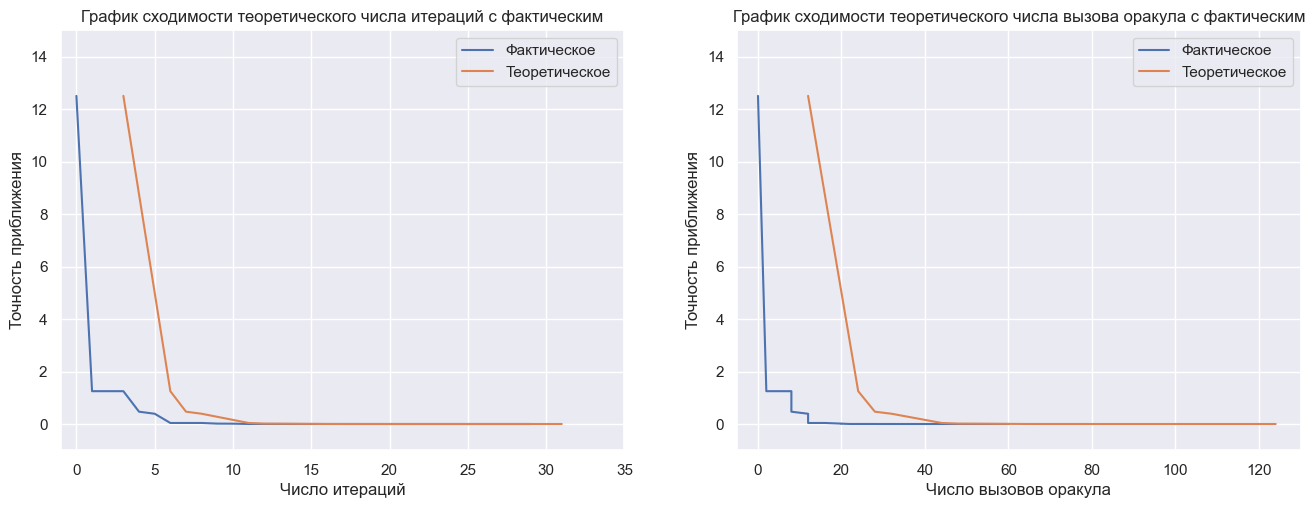

In [ ]:
plt.figure(figsize = (16, 12))

plt.subplot(2, 2, 1)

plt.plot(dichotomy_iterations_count_list, dichotomy_differences)
plt.plot(dichotomy_theor_iterations_count_list, dichotomy_differences)

plt.title("График сходимости теоретического числа итераций с фактическим")
plt.xlabel("Число итераций")
plt.ylabel("Точность приближения")
plt.legend(("Фактическое", "Теоретическое"))
plt.xlim(-1, 35)
plt.ylim(-1, 15)

plt.subplot(2, 2, 2)

plt.plot(dichotomy_oracle_call_count_list, dichotomy_differences)
plt.plot(dichotomy_theor_oracle_call_count_list, dichotomy_differences)

plt.title("График сходимости теоретического числа вызова оракула с фактическим")
plt.xlabel("Число вызовов оракула")
plt.ylabel("Точность приближения")
plt.legend(("Фактическое", "Теоретическое"))
plt.xlim(-5, 130)
plt.ylim(-1, 15)

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **3 из 3 баллов**

__Задача 2. (всего 10 баллов)__ Рассмотрим метод золотого сечения:

```python
def binpoisk(f, a, b, eps):
    tau = (1 + sqrt(5)) / 2
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        if f(d) <= f(c):
            a = c
        else:
            b = d
    return (a + b) / 2
```

__а). (2 балла)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции.

Докажем корректность:
1. Перед началом доказательства рассмотрим следующее неравенство: $$a + \frac{b-a}{\tau} - b + \frac{b-a}{\tau} > 0, \tau = \frac{1 + \sqrt{5}}{2}.$$ Его можно преобразовать в следующий вид:
$$\frac{(b-a)(2 - \tau)}{\tau} > 0.$$ Так как из логики алгоримтма следует, что выполнены условия $$1< \tau < 2$$ $$b - a > 0,$$ то исходное неравенство будет тоже всегда верно. Из этого получаем, что на каждой итерации алгоритма $c < d$.
2. Теперь проведем рассуждение, аналогичное доказательству корректности метода дихотомии: изначально знаем, что у функции один локальный экстремум на отрезке $[a, b]$.
3. Пока отрезок меньше заданной длины $\varepsilon$, исследовать его части до нахождения точки в $\varepsilon$-окрестности локального экстремума.
4. Рассмотрим так называемые точки "золотого сечения" исходного отрезка $c, d$, определенные как $b - \frac{b-a}{\tau}, a - \frac{b-a}{\tau}$ соответственно.
5. В случае, если значение функции в точке $d$ оказалось меньше значения функции в точке $c$, то в силу унимодальности функции экстремум находится точно не между точками $a$ и $c$. Тогда необходимо исследовать только выбранную часть отрезка, поэтому левой границей вместо $a$ выбираем точку $c$ и возвращаемся к пункту 4.
6. В случае же, если условие из пункта 5 не было выполнено, то в силу унимодальности функции экстремум следует искать левее точки $d$. Для этого будем считать новой точкой $b$ точку $d$ и вернемся к пункту 4.

Таким образом, на каждом шаге нашей функции будет выбираться отрезок, на котором следует искать локальный экстремум (функция унимодальна, значит такой отрезок будет лишь один) и это будет выполняться до момента, пока локальный экстремум не будет обнаружен с заданной точностью $\varepsilon$.  

Сходимость же алгоритма следует из того, что каждый раз длина отрезка, на котором проводится поиск и гарантированно сожержится экстремум уменьшается в $\tau > 1$ раз, поэтому для любого заданного $\varepsilon > 0$ через определенное кодичество шагов найдется отрезок, содержащий локальный экстремум.

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **2 из 2 баллов**

__б). (5 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Лучше или хуже данный алгоритм, чем метод дихотомии?

_Hint:_ возможно ли улучшения псевдокода метода золотого сечения с точки зрения оракульной сложности?

Сначала получим верхнюю оценку на итерационную сложность:  
Аналогичными с методом дихотомии рассуждениями получаем, что после $k$ итераций должно быть выполнено условие $\frac{b - a}{\tau^k} \leq \varepsilon$ и, как следствие, получаем следующую оценку: $$k \geq \log_{\tau}\frac{b - a}{\varepsilon}.$$  
Из целости же $k$ и логики алгортма получаем: $$k \leq \lfloor \log_{\tau}\frac{b - a}{\varepsilon} \rfloor + 1.$$  

Теперь получим оракульную сложность:  
Так как на каждой итерации количество обращений к оракулу не превосходит 2, то справедлива следюущая оценка на оракульную сложность: $$o \leq 2 \cdot (\lfloor \log_{\tau}\frac{b - a}{\varepsilon} \rfloor + 1).$$

Приведем способ как уменьшить оракульную сложность данного алгоритма:  
Покажем, что можно на всех шагах кроме первого строить не две, а всего одну новую точку. Для этого нам надо доказать, что одна из точек предыдущего шага уже будет являться точкой золотого сечения будущего отрезка, то есть без огранчения общности выполнение следущего равенства (другой случай симметричен): $$b - \frac{b-a}{\tau} = a + \frac{d - a}{\tau}.$$
1. Из предыдущих заданий знаем, что $$d-a = \frac{b-a}{\tau}.$$  

2. Рассмотрим следущую разность: $b - a - \frac{b-a}{\tau} = (b-a)(1 - \frac{1}{\tau}) = \frac{b-a}{\tau^2}$ (последний переход справедлив в силу свойств $\tau$).  

3. Объединив пункты 1 и 2 получим требуемое утверждение.

Тогда, так как на каждом шаге итерации кроме первого необходимо строить только одну новую точку, то можно запоминать значения предсказаний оракула с прошлого шага и не просить его посчитать значения функции в точке, которая присутствует с текущем отрезке с предыдущего шага. Тем самым можно будет уменьшить оценку оракульной сложности до следующей: $$o \leq \lfloor \log_{\tau}\frac{b - a}{\varepsilon} \rfloor + 2.$$

Таким образом, у алгоритма золотого сечения меньшая по сравнеию с дихотомией оракульная сложность, но больше итерационная (в силу меньшего основания логарифма), поэтому нельзя точно сказать, какой алгоритм лучше.

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **5 из 5 баллов**

__в). (3 балла)__ Реализуйте метод золотого сечения. Добавьте результаты золотого сечения (теоретические и практические) на графики из пункта 1.г. Сделайте вывод.

In [ ]:
def golden_section(f, a, b, eps, points, iterations_count_list, oracle_call_count_list):
    iterations_count = 0
    oracle_call_count = 0
    tau = (1 + math.sqrt(5)) / 2
    while (b - a) > eps:
        m = (a + b) / 2
        points.append(m)
        iterations_count_list.append(iterations_count)
        iterations_count += 1
        t = (b - a) / tau
        c = b - t
        d = a + t
        oracle_call_count_list.append(oracle_call_count)
        oracle_call_count += 2
        if f(d) <= f(c):
            a = c
        else:
            b = d
    return (a + b) / 2

In [ ]:
golden_section_points = []
golden_section_iterations_count_list = []
golden_section_oracle_call_count_list = []

In [ ]:
a, b, eps = -40, 15, 0.0000001
golden_section(f, a, b, eps, golden_section_points, golden_section_iterations_count_list, golden_section_oracle_call_count_list)

7.638845262239863e-08

In [ ]:
extremum = 0
tau = (1 + math.sqrt(5))/2
golden_section_differences = list(map(lambda x: abs(x - extremum), golden_section_points))
golden_section_theor_iterations_count_list = np.floor(np.log((b - a) / np.array(golden_section_differences)) / np.log(tau) + 1)
golden_section_theor_oracle_call_count_list = 2 * (np.floor(np.log((b - a) / np.array(golden_section_differences)) / np.log(tau)) + 1)

(-1.0, 15.0)

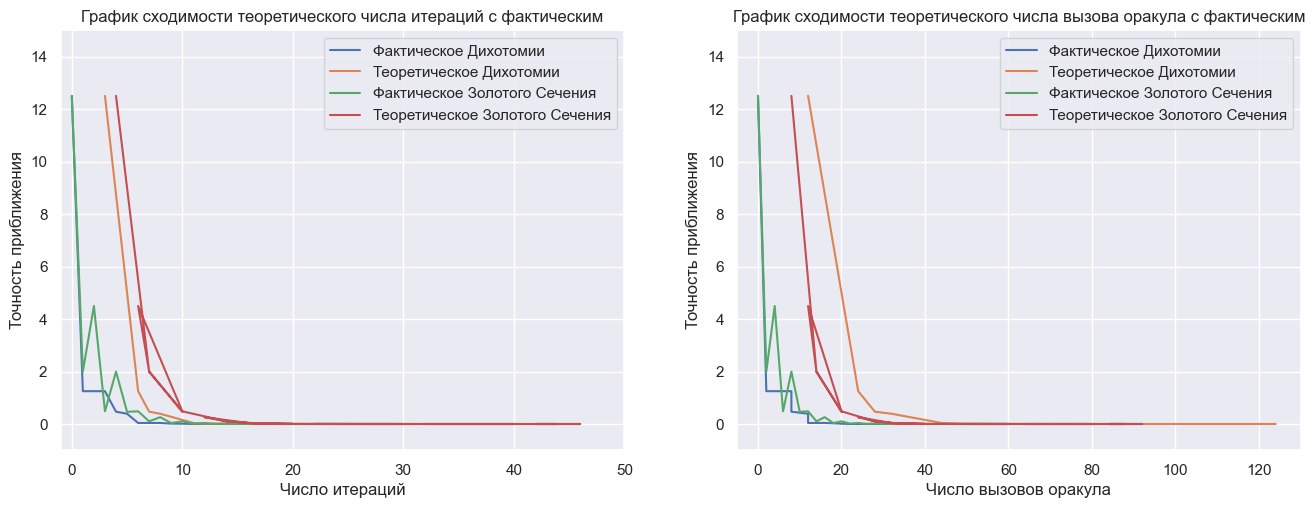

In [ ]:
plt.figure(figsize = (16, 12))

plt.subplot(2, 2, 1)

plt.plot(dichotomy_iterations_count_list, dichotomy_differences)
plt.plot(dichotomy_theor_iterations_count_list, dichotomy_differences)
plt.plot(golden_section_iterations_count_list, golden_section_differences)
plt.plot(golden_section_theor_iterations_count_list, golden_section_differences)


plt.title("График сходимости теоретического числа итераций с фактическим")
plt.xlabel("Число итераций")
plt.ylabel("Точность приближения")
plt.legend(("Фактическое Дихотомии", "Теоретическое Дихотомии", "Фактическое Золотого Сечения", "Теоретическое Золотого Сечения"))
plt.xlim(-1, 50)
plt.ylim(-1, 15)

plt.subplot(2, 2, 2)

plt.plot(dichotomy_oracle_call_count_list, dichotomy_differences)
plt.plot(dichotomy_theor_oracle_call_count_list, dichotomy_differences)
plt.plot(golden_section_oracle_call_count_list, golden_section_differences)
plt.plot(golden_section_theor_oracle_call_count_list, golden_section_differences)

plt.title("График сходимости теоретического числа вызова оракула с фактическим")
plt.xlabel("Число вызовов оракула")
plt.ylabel("Точность приближения")
plt.legend(("Фактическое Дихотомии", "Теоретическое Дихотомии", "Фактическое Золотого Сечения", "Теоретическое Золотого Сечения"))
plt.xlim(-5, 130)
plt.ylim(-1, 15)

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **3 из 3 баллов**

### Часть 2. Матрично-векторное дифференцирование. Теория

В этой части используется следующие обозначения:

$\mathbb{R}_+$ - неотрицательные вещественные числа

$\mathbb{R}_{++}$ - положительные вещественные числа

$I_d$ - матрица с единицами на диагонали (вне диагонали 0)

$A \in \mathbb{S}^d \quad\Longleftrightarrow \quad A= A^\top$

$A \in \mathbb{S}^d_+ \quad\Longleftrightarrow \quad A \in \mathbb{S}^d ; \quad  \forall x: \quad  x^\top Ax \geq 0$

$A \in \mathbb{S}^d_{++}\quad \Longleftrightarrow \quad A \in \mathbb{S}^d ; \quad \forall x \neq 0: \quad  x^\top Ax > 0$

Норма Фробениуса для матрицы $A \in \mathbb{R}^{d \times d}$ определяется как $||A||_F = \sqrt{\sum_{i=1}^d \sum_{j=1}^d A^2_{ij}}$

Для матриц скалярное произведение определено как $\langle X, Y \rangle := \text{Tr}(X^\top Y)$

__Задача 1. (всего 5 баллов)__ Вычилите первую и вторую производные $f'(t)$ и $f''(t)$ для следующих функций:

__а). (2 балла)__ $f : E \to \mathbb{R}$ - функция $f(t) := \det(A - t I_d)$, где $A \in \mathbb{R}^{d \times d}$, $E := \{ t \in \mathbb{R} : \det(A - t I_d) \neq 0 \}$.

Найдем первую производную:

1. $d(\det(A - t I_d) = \det(A - t I_d) \cdot Tr((A - t I_d)^{-1} d(A - t I_d)$.
2. $Tr((A - t I_d)^{-1} d(A - t I_d) = -Tr((A - t I_d)^{-1} d(t)$.
3.  Объединяя пункты 1 и 2 получим, что $df(t) = -\det(A - t I_d) \cdot Tr((A - t I_d)^{-1} d(t))$.
4. Тогда $f'(t) = -\det(A - t I_d) \cdot Tr((A - t I_d)^{-1})$.

Теперь найдем вторую производную:

1. $d^2 f(t) = d(-\det(A - t I_d) \cdot Tr((A - t I_d)^{-1} d(t))dt) = -d(\det(A-t I_d)) \cdot Tr((A - t I_d)^{-1}dt) - \det(A-t I_d) \cdot d(Tr(A - t I_d)^{-1}dt).$
2. Из поиска первой производной первое слагаемое равно $\det(A - t I_d) \cdot Tr^{2}((A - t I_d)^{-1})dt^2.$
3. Второе слагаемое же равно $ -\det(A - t I_d) \cdot Tr(d((A - t I_d)^{-1}))dt = \det(A - t I_d) \cdot Tr((A- t I_d)^{-1} d(A - t I_d) (A - t I_d)^{-1})dt = -\det(A - t I_d) \cdot Tr(((A- t I_d)^{-1})^2)dt^2.$
4. Тогда $f'(t) = det(A - t I_d) \cdot (Tr^{2}((A - t I_d)^{-1}) - Tr(((A- t I_d)^{-1})^2)).$

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **2 из 2 баллов**

__б). (3 балла)__ $f : \mathbb{R}_{++} \to \mathbb{R}$ - функция $f(t) := \| (A + t I_d)^{-1} b \|^2$, где $A \in \mathbb{S}^d_{++}$, $b \in \mathbb{R}^d$.

Найдем первую производную:

1. $df(t) = 2\| (A + t I_d)^{-1} b \| \cdot d(\| (A + t I_d)^{-1} b \|)$.
2. $d(\| (A + t I_d)^{-1} b \|) = \langle \frac{(A + t I_d)^{-1}b}{\| (A + t I_d)^{-1}b \|}, d((A + t I_d)^{-1}b) \rangle$.
3. Из первого и второго пункта $df(t) = 2⟨ (A + t I_d)^{-1} b,  d((A + t I_d)^{-1}b⟩$.
4. $d((A + t I_d)^{-1}b  = -  \cdot (A + t I_d)^{-1} \cdot d((A + t I_d)^{-1})\cdot (A + t I_d)^{-1} \cdot b = - ((A + t I_d)^{-1})^2 bdt.$
5. Из 3 и 4 пункта $df(t) = -2 ⟨((A + t I_d)^{-1})b, ((A + t I_d)^{-1})^2 bdt⟩ = -2b^T (((A + t I_d)^{-1})^2)^T (A + t I_d)^{-1}bdt.$
6. Из того факта, что $A \in \mathbb{S}^d_{++}$ (а значит и $(A - t I_d)^{-1}$) и 5 пункта получим, что $f'(t) = -2b^T((A + t I_d)^{-1})^ b.$

Тепрь найдем вторую производную:

1. $d^2 f(t) =  -2b^Td(((A + t I_d)^{-1})^3)bdt = -6b^T \cdot ((A + t I_d)^{-1})^2 \cdot d((A + t I_d)^{-1})bdt = 6b^T \cdot ((A + t I_d)^{-1})^2 \cdot ((A + t I_d)^{-1})^2bdt^2 .$
2. Тогда вторая производная равна $6b^T \cdot ((A + t I_d)^{-1})^4b.$

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** неправильно найдена первая производная **2 из 3 баллов**

__Задача 2. (всего 9 баллов)__ Вычислите градиент $\nabla f$ и гессиан $\nabla^2 f$ для следующих функций:

__а). (4 балла)__ $f : \mathbb{R}^d \to \mathbb{R}$ - функция $f(x) := \frac{1}{2} \| x x^T - A \|_F^2$, где $A \in \mathbb{S}_{++}^d$.

Найдем градиент:  

1. Зная формулу дифференциала нормы Фробениуса посчитаем $df(x) = \|xx^T - A\|_F \cdot d(\|xx^T - A\|) = \|xx^T - A\|_F \cdot \langle \frac{xx^T - A}{\|xx^T - A \|_F}, d(xx^T) \rangle = \langle xx^T - A, d(xx^T) \rangle = \langle xx^T - A, d(x)x^T \rangle  + \langle xx^T - A, xd(x^T) \rangle = \langle xx^T - A, d(x)x^T \rangle  + \langle xx^T - A, x(dx)^T \rangle  = \langle (xx^T - A)x, d(x) \rangle  + \langle (xx^T - A)dx, x \rangle.$
2. Из симметриччности матриц $xx^T, A$ получим, что $\langle (xx^T - A)dx, x \rangle= \langle (xx^T - A)x, dx \rangle.$
3. Из 1 и 2 пункта получим, что $\nabla f = 2(xx^T - A)x.$

Теперь найдем Гессиан:

1. $d^2 f(x) =2 d(\langle (xx^T - A)x, dx_1 \rangle)$
2. $ d(\langle (xx^T - A)x, dx_1 \rangle) = \langle d((xx^T - A)x), dx_1 \rangle = \langle d(xx^T - A)x, dx_1 \rangle + \langle (xx^T - A)dx, dx_1 \rangle = \langle d(x)x^Tx + x(dx)^Tx, dx_1 \rangle +\langle (xx^T - A)dx_1, dx \rangle = \langle d(x)x^Tx, dx_1 \rangle + \langle x(dx)^Tx, dx_1 \rangle + \langle (xx^T - A)dx_1, dx \rangle = \langle x^Tx dx_1, dx \rangle + \langle xx^T dx, dx_1\rangle + \langle (xx^T - A)dx_1, dx) = x^Tx \langle dx_1, dx \rangle + \langle (2xx^T - A)dx_1, dx \rangle.$
3. Тогда $\nabla^2f = x^Tx I_d + 4xx^T - 2A.$

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **4 из 4 баллов**

__б). (5 баллов)__ $f : \mathbb{R}^d \setminus \{ 0 \} \to \mathbb{R}$ - функция $\displaystyle f(x) = \langle x, x \rangle^{\langle x, x \rangle}$.

Найдем градиент:

1. Сначала представим $f(x) = e^{\langle x, x \rangle \cdot ln\langle x, x \rangle}.$
2. Тогда $ df(x) =  e^{\langle x, x \rangle \cdot ln\langle x, x \rangle} d(\langle  x, x \rangle ln \langle x, x \rangle).$
3. $d(\langle  x, x \rangle ln \langle x, x \rangle) = d(\langle x, x \rangle)ln\langle x, x \rangle + \langle x, x\rangle d(ln(\langle x, x \rangle) = 2 \langle x, dx \rangle(ln\langle x, x \rangle + 1) = 2 \langle x(ln\langle x, x\rangle + 1), dx \rangle.$
4. Из 2 и 3 пунктов следует, что $\nabla f = 2 \langle x, x \rangle ^{\langle x, x \rangle}x(ln\langle x, x\rangle + 1).$

Теперь найдем гессиан:
1. $d^2f(x) = d \langle 2 \langle x, x \rangle ^{\langle x, x \rangle}x(ln\langle x, x\rangle + 1), dx_1 \rangle = 2 \langle d(\langle x, x \rangle ^{\langle x, x \rangle}x(ln\langle x, x\rangle + 1)), dx_1 \rangle$
2. $ d(\langle x, x \rangle ^{\langle x, x \rangle}x(ln\langle x, x\rangle + 1)) = (d(\langle x, x \rangle ^{\langle x, x \rangle})xln(\langle x, x \rangle + 1) + \langle x, x \rangle ^{\langle x, x \rangle} d(ln(\langle x, x \rangle + 1) x).$
3. $d(xln(\langle x, x \rangle + 1)) = xd(ln\langle x, x \rangle + 1) + (ln\langle x, x \rangle + 1) dx = x\frac{2\langle x, dx \rangle}{\langle x, x \rangle} + (ln\langle x, x \rangle + 1) dx =( 2\frac{x x^T}{\langle x, x \rangle} + I_d(ln\langle x, x \rangle + 1))dx.$
4. Из нахождения градиента и пунктов 2 и 3 следует, что $d(\langle x, x \rangle ^{\langle x, x \rangle}x(ln\langle x, x\rangle + 1)) = 2 \langle x, x \rangle^{\langle x, x \rangle} xx^T(ln\langle x, x \rangle + 1)^2dx + 2\langle x, x \rangle^{\langle x, x \rangle}(\frac{x x^T}{\langle x, x \rangle} + I_d(ln\langle x, x \rangle + 1))dx = 2 \langle x, x \rangle^{\langle x, x \rangle}(xx^T (ln\langle x, x \rangle + 1)^2 + \frac{x x^T}{\langle x, x \rangle} + I_d(ln\langle x, x \rangle + 1))dx.$
5. Тогда из симмтеричности матриц и предыдущих пунктов получим, что $\nabla^2 f = 4 \langle x, x \rangle^{\langle x, x \rangle}(xx^T (ln\langle x, x \rangle + 1)^2 + \frac{x x^T}{\langle x, x \rangle} + I_d(ln\langle x, x \rangle + 1)).$

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **2 из 5 баллов**

__Задача 3. (всего 11 баллов)__ Для каждой из следующих функций $f$ покажите, что вторая производная является знакоопределенной (как квадратичная форма) и установите ее знак:

__а). (5 баллов)__ $f : \mathbb{R}^d_{++} \to \mathbb{R}$ - функция $f(x) := \prod_{i=1}^d x_i^{\alpha_i}$, где $\alpha_1, \dots, \alpha_d \geq 0$, $\sum_{i=1}^d \alpha_i = 1$.

Сначала найдем гессиан для его исследования.

1. Для этого найдем первую производную:
$\frac{\partial f}{\partial x_i} = \frac{f(x) \alpha_i}{x_i}.$

2. Тогда можем получить:  
$J_{i, i} = \frac{\partial^2 f}{\partial x_i^2} = \frac{f(x) \alpha_i(\alpha_i - 1)}{x_i^2}.$  
$J_{i, j, i \neq j} = \frac{\partial^2 f}{\partial x_i x_j} = \frac{f(x) \alpha_i \alpha_j}{x_i x_j}$.

Далее будем оценивать выражение $y^T J y$:

3. Для этого распишем его вид:  
$y^T J y = \sum_{i, j = 1}^d J_{i, j} y_i y_j = \sum_{i = 1}^d J_{i, i} y_i^2  + \sum_{i, j = 1, i \neq j}^d J_{i, j} y_i y_j= f(x)(\sum_{i = 1}^d \frac{\alpha_i(\alpha_i - 1)y_i^2}{x_i^2} + \sum_{i, j = 1, i \neq j}^d \frac{\alpha_i \alpha_j y_i y_j}{x_i x_j}) = f(x)(\sum_{i, j = 1}^d \frac{\alpha_i \alpha_j y_i y_j}{x_i x_j} - \sum_{i = 1}^d \frac{\alpha_i y_i^2}{x_i^2}) = f(x) ((\sum_{i = 1}^d \frac{\alpha_i y_i}{x_i})^2 - \sum_{i = 1}^d \frac{\alpha_i y_i^2}{x_i^2}).$
Последний переход справделив в силу равенства частных производных.

4. С помощью КБШ оценим квадрат суммы в предыдущем выражении:
$(\sum_{i = 1}^d \frac{\alpha_i y_i}{x_i})^2 \leq (\sum_{i = 1}^d \alpha_i) (\sum_{i = 1}^d \frac{\alpha_i y_i^2}{x_i^2}) = 1 \cdot \sum_{i = 1}^d \frac{\alpha_i y_i^2}{x_i^2}.$
То есть подскобочное выражение в пункте 3 не больше 0.

5. Из пунктов 3 и 4 и того факта, что $f(x) > 0$ получим, что $y^T J y \leq 0$, а значит вторая производная отрицательно полуопределена.



**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **5 из 5 баллов**

__б). (6 баллов)__ $f : \mathbb{S}^d_{++} \to \mathbb{R}$ - функция $f(X) := \langle X^{-1}, A \rangle$, где $A \in \mathbb{S}^d_+$.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 6 баллов**

__Задача 4. (5 баллов)__ Для указанного графа вычислений найдите градиент $\nabla_A L, \nabla_b L$ функции потерь $L$ по входным переменным $A,b$ соответственно. Градиент по $x$ считать известным и равным $\nabla_x L$. Рекомендуется использовать алгоритм backpropogation.

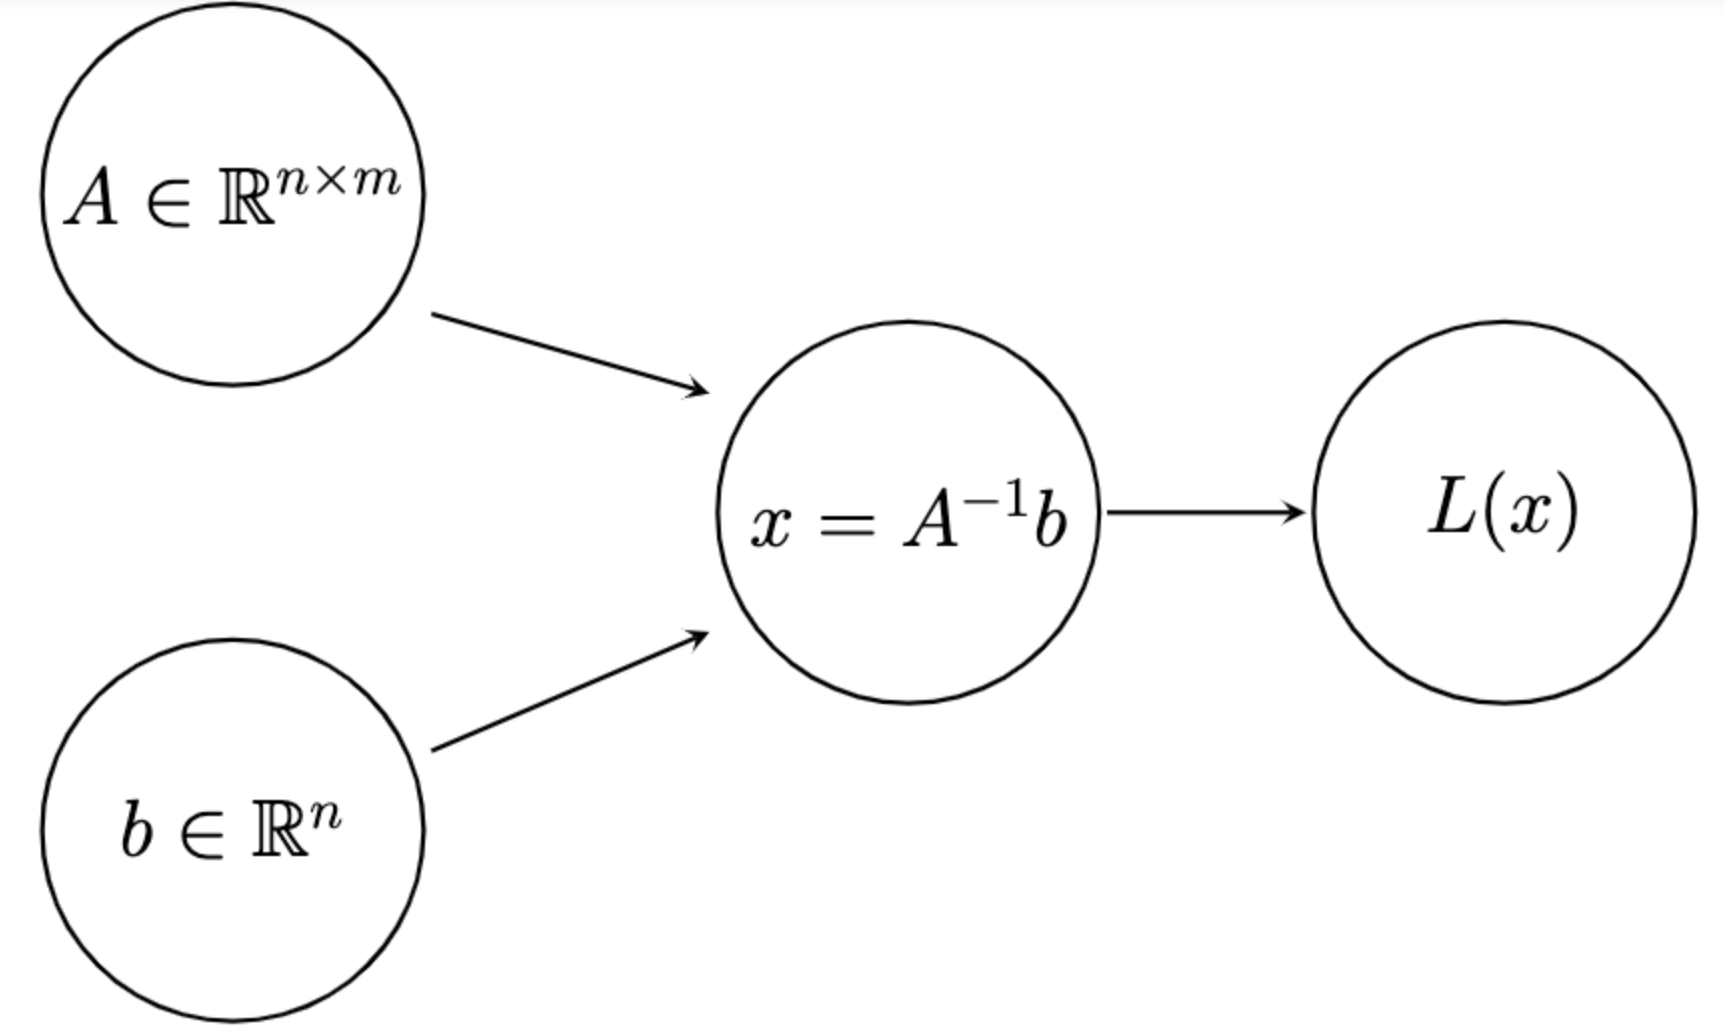

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 5 баллов**

### Часть 3. Градиентный спуск

__Задача. (всего 25 баллов)__ Рассмотрим следуюущую задачу оптимизации:

\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__а). (2 балла)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

Исследуем на выпуклость:

1. Будем оценивать выпуклость по определению: функция $f$ называется выпуклой, если $$\forall x, y \in R^d \hookrightarrow f(y) \geq f(x) + \langle \nabla f(x), y - x \rangle.$$

2. Заметим, что $f(x) = \frac{1}{2} \langle Ax, x \rangle - \langle b, x \rangle $ и тогда найдем градиент функции:  
$df(x) = \frac {1}{2} \langle (A + A^T)x - b, dx \rangle.$  
Тогда $\nabla f = \frac{1}{2}(A + A^T)x - b.$

3. Подставим полученное в пункт 1 и преобразуем:  
$$\frac{1}{2} y^T A y - b^T y \geq \frac{1}{2} x^T A x - b^T x + \frac{1}{2}(y-x)^TAx + \frac{1}{2}(y-x)^TA^Tx - (y-x)^Tb.$$
$$\frac{1}{2}(y-x)^T A (y-x) -b^T(y-x) \geq \frac{1}{2}(y-x)^TAx + \frac{1}{2}x^T A(y-x) - b^T(y-x).$$
$$\frac{1}{2}(y-x)^T A (y-x) \geq \frac{1}{2}y^T Ay.$$
$$x^T A x \geq 0 .$$

4. Полученное неравенство является определением положительной полуопределенности матрицы. То есть исходная функция будет выпуклой в том случае, если матрица $A$ является положительно полуопределенной.

Теперь исследуем на сильную выпуклость:

1. Будем оценивать сильную выпуклость по критерию: функция $f$ называется сильно выпуклой, если $$\forall x \in R^d \hookrightarrow \nabla^2 f(x) \geq \mu I_d.$$

2. Найдем гессиан функции:  
$d^2 f(x) = \langle d(\frac{1}{2}(A + A^T)x - b), dx_1 \rangle  = \langle \frac{1}{2} (A + A^T) dx_1, dx \rangle.$
Тогда $\nabla^2 f =  \frac{1}{2} (A + A^T).$

3. Подставим полуенное в пункт 1 и преобразуем:
$$\frac{1}{2} (A + A^T) \geq \mu I_d.$$
$$\frac{1}{2} (A + A^T) - \mu I_d \geq 0 .$$

4. Полученное неравенство является определением положительной полуопределенности матрицы. То есть исходная функция будет сильно выпуклой в том случае, если матрица $\frac{1}{2} (A + A^T) - \mu I_d$ является положительно полуопределенной.

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **2 из 2 баллов**

__б). (4 балла)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 4 баллов**

__в). (3 балла)__ Предложите способ генерации матрицы $А$ так, чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$. Докажите, что способ корректен. Диагональная матрица даст только 1 балл в данном пункте.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 4 баллов**

__г). (3 балла)__  Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше, и произвольным вектором $b$ (лучше ненулевым). Желательно уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы.

По желанию: можно воспользоваться предложенным ниже вариантом описания функции.

In [ ]:
def gradient_descent(f, nabla_f, x_0, x_sol, gamma_k,
                     K = 10**3, eps = 10**-5, mode = 'x_k - x^*'):
    '''
        f - целевая функция
        nabla_f - градиент целевой функции
        x_0 - стартовая точка
        x_sol - точное решение (оно нужно для подсчета ошибки)
        gamma_k - функция для вычисления шага метода
        K - количество итераций (по умолчанию 1е3)
        eps - желаемая точность (по умолчанию 1е-5)
        mode - критерий сходимости
               Значения либо 'x_k - x^*' - тогда критерий сходимости будет ||x_k - x^*||,
               либо 'f(x_k) - f(x^*)' - тогда критерий сходимости будет f(x_k) - f(x^*),
               либо 'x_k+1 - x_k', либо 'f(x_k+1) - f(x_k)' (критерии будут аналогичными)

        Функция возвращает точку, в которой достигается минимум и вектор ошибок
    '''
    return

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 3 баллов**

__д). (2 балла)__ Для задачи с $d = 50$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^3$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x^0$ (если $b$ ненулевой, то можно взять нулевой $x^0$). Проверьте сходится ли он. В качестве критерия сходимости используйте $\| x_k - x^*\|^2$. Постройте график сходимости: по оси абцисс - номер итерации, по ординат - значения критерия на этой итерации. Сделайте вывод о характере сходимости.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 2 баллов**

__е). (1 балл)__ Добавьте на график теоретическую сходимость, полученную на лекции. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 1 баллов**

__ж). (3 балла)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Проверьте диапозон от $0$ до $3/L$. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). На каком шаге получен наибыстрейший результат. Как думаете почему?

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 3 баллов**

__з). (7 баллов)__  Исследуйте другие техники подбора шага:

1) Уменьшающийся с номером итерации шаг: $\gamma_k = \frac{\gamma}{\delta + k}$ или $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где $\gamma$ и $\delta$ нужно подобрать отдельно. Какая конфигурация $\gamma$ и $\delta$ показала наилучший результат?

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$. Как будете вычислять значение $\gamma_k$ в данном случае?

3) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$ нужно подобрать отдельно. Какое $\alpha$ дало лучший результат?

Сравните все подходы подбора шага между собой (в том числе из предыдуших пунктов). Важно, что сравнивать нужно не только число итераций, но и время работы методов. Постройте графики сравнения и сделайте вывод.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 7 баллов**

### Часть 4. Матрично-векторное дифференцирование. Практика

__Задача. (всего 20 баллов)__ Перед Вами стоит задача приближения матрицы $X  \in \mathbb{R}^{N \times M}$ неизвестными матрицами $U \in \mathbb{R}^{N \times r}, V \in \mathbb{R}^{M \times r}$ заданной размерности $r$.

В качестве такого приближения предлагается использовать линейное представление $\hat{X} = U V^T$.

В рамках данного задания Вам предстоит решить задачу оптимизации функции *MSE*:
$$MSE(X, \hat{X}) = \frac{1}{N M} ||X - \hat{X} ||^2_F = \frac{1}{N M} ||X - U V^T ||^2_F.$$

__a). (3 балла)__ Выпишите формулы для градиентов $\nabla_U MSE, \nabla_V MSE$.

Найдем $\nabla_U MSE$:

1. Зная формулу дифферерциала нормы Фробениуса получим: $d_U MSE = \frac{1}{NM}d(\| X - UV^T \|^2_F) = \frac{2}{NM} \|X - UV^T \|_F  \langle \frac{X - UV^T}{\|X - UV^T \|_F}, -(dU)V^T \rangle = \langle \frac{-2}{NM}(X - UV^T)V, dU \rangle.$

2. Тогда $\nabla_U MSE = \frac{-2}{NM}(X - UV^T)V.$

Теперь найдем $\nabla_V MSE$:

1. 1. Зная формулу дифферерциала нормы Фробениуса получим: $d_V MSE = \frac{1}{NM}d(\| X - UV^T \|^2_F) = \frac{2}{NM} \|X - UV^T \|_F  \langle \frac{X - UV^T}{\|X - UV^T \|_F}, -U(dV)^T \rangle = \langle \frac{-2}{NM}(X - UV^T)^T U, dV \rangle.$

2. Тогда $\nabla_V MSE = \frac{-2}{NM}(X - UV^T)^TU.$

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **3 из 3 баллов**

__б). (10 баллов)__ Реализуйте версии градиентного спуска для данной задачи на библиотеках ```numpy```, ```jax``` и ```pytorch```. Сгенерируйте случайную матрицу $X$ с $N \geq 10000$, $M \geq 200$. Возьмите $r = 10$. Запустите все алгоритмы на 100 итераций (это мало для сравнения библиотек, но для теста работоспсобности кода - достаточно). Постройте графики значения $MSE$ для каждого из 3 алгоритмов: по оси абцисс - номер итерации, по ординат - MSE.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет три линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 10 баллов**

__г). (7 баллов)__ Оцените эффективность трёх реализаций по сходимости до заданной точности:

- ***проследите, что сравниваете на одном device;***
- добавьте возможность измерения времени работы алгоритмов;
- изменяя $r$ при фиксированной матрице $X$ (случайная с $N \geq 10000$, $M \geq 200$), нарисуйте зависимость времени сходимости до точности $MSE \leq 10^{-3}$ от $r$;
- при фиксированных $r = 10$ и $M \geq 200$, показать характер поведения аналогичного графика при изменяющемся $N$;
- сделайте выводы.

In [ ]:
#ваше решение

**КОММЕНТАРИЙ ПРОВЕРЯЮЩЕГО:** **0 из 7 баллов**